# <font color=orange>**OpenCV ile Nesne Takibi**</font>

## <font color=gold>**Kesifsel Veri Analizi**</font> <font color=gray>**(EDA)**</font>

In [2]:
'''
- Veriseti inceleme
- Veriseti indirme
- resm2video
- eda -> gt (Ground Truth)
'''

'\n- Veriseti inceleme\n- Veriseti indirme\n- resm2video\n- eda -> gt (Ground Truth)\n'

In [26]:
import cv2
import os
from os.path import isfile, join
import matplotlib.pyplot as plt

In [9]:
pathIn  = r'img1'
pathOut = 'MOT17-13-SDP.mp4'

files = [f for f in os.listdir(pathIn) if isfile(join(pathIn,f))]

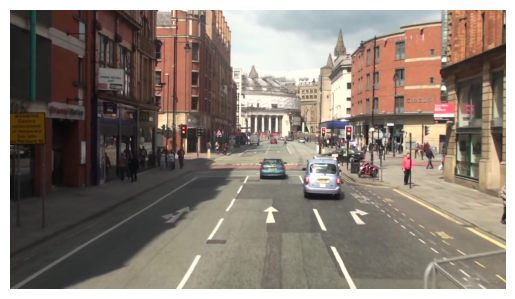

In [27]:
#deneme 

img = cv2.imread(pathIn + '\\' + files[44])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(), plt.imshow(img), plt.axis('off');

In [ ]:
# Resimleri video'ya cevirme:
# Asagidaki bilgiler videolarin sayfasinda var:
fps = 25
size = (1920,1080)

out = cv2.VideoWriter(pathOut, cv2.VideoWriter_fourcc(*'MP4V'), fps, size, True)

for i in files:
    print(i)
    
    fileName = pathIn + '\\' + i
    
    img = cv2.imread(fileName)
    
    out.write(img)
    
out.release()

### <font color=gray>**Kesifsel Veri Analizi**</font>

In [28]:
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns

Konu Linkleri:

https://motchallenge.net/vis/MOT17-13-SDP/det/
https://arxiv.org/pdf/1603.00831.pdf


In [29]:
# Degiskenler
col_list = ['frame_number','identity_number',
            'left','top','width','height',
            'score','class','visibility']

In [30]:
data = pd.read_csv('gt.txt',names=col_list)
df = data.copy()

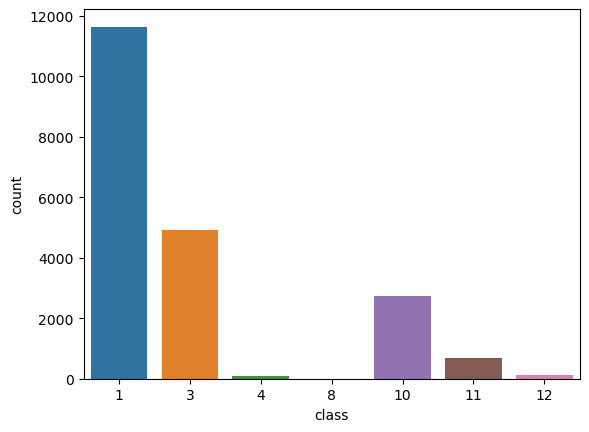

In [31]:
from warnings import filterwarnings
filterwarnings('ignore')

plt.figure()
sns.countplot(df['class']);

In [32]:
# car sinifinin secilmesi:
car = df[df['class']==3]
car.shape

(4918, 9)

In [34]:
# Videonun iceri aktarilmasi

video_path = 'MOT17-13-SDP.mp4'

cap = cv2.VideoCapture(video_path)

# video izlendiginde (GroundTruth) 29 numarali frame gozukmekte
id1 = 29
numberOfImage = np.max(df['frame_number'])
fps = 25

bound_box_list = []
for i in range(numberOfImage-1):
    ret, frame = cap.read()
    
    if ret:
        frame = cv2.resize(frame, dsize=(960,540))
        # Filtreleme:
        filter_id1 = np.logical_and(car['frame_number'] == i+1, car['identity_number'] == id1)
        
        if len(car[filter_id1]) != 0:
            x = int(car[filter_id1].left.values[0]/2)
            y = int(car[filter_id1].top.values[0]/2)
            w = int(car[filter_id1].width.values[0]/2)
            h = int(car[filter_id1].height.values[0]/2)
            
            # Kutucuklarin cizilmesi:
            cv2.rectangle(frame, (x,y), (x+w,y+h), (0,255,0),2)
            cv2.circle(frame, (int(x+w/2), int(y+h/2)), 2, (0,0,255),-1)
            # Frame, x,y, genislik, yukseklik, center_x, center_y
            bound_box_list.append([i,x,y,w,h,int(x+w/2), int(y+h/2)])
            
        cv2.putText(frame, 'Frame num:' + str(i+1), (10,30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255),2)
        cv2.imshow('Frame',frame)
        
        if cv2.waitKey(1) & 0xFF == ord('q'): break
        
    else:
        break
        
cap.release()
cv2.destroyAllWindows()

In [23]:
df = pd.DataFrame(bound_box_list, columns=['frame_no','x','y','w','h','center_x','center_y'])
df.head()

,frame_no,x,y,w,h,center_x,center_y
0,0,477,274,40,31,497,289
1,1,477,272,41,31,497,287
2,2,478,273,41,32,498,289
3,3,478,274,41,32,498,290
4,4,479,275,42,32,500,291


In [24]:
#df bilgilerinin disariya aktarilmasi:
df.to_csv('gt_new.txt', index=False)